<a href="https://colab.research.google.com/github/JaminUbuntu/IBOK_STA/blob/main/final_IBOKb_STA_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries / Loading Files

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from scipy.stats import uniform

In [31]:
# Configuring visual settings
sns.set(style="whitegrid")

In [32]:
# Load datasets
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')
time = pd.read_csv('time.csv')

In [33]:
X

,x1,x2
0,-1.383423,0
1,0.491178,0
2,-0.528827,0
3,-0.359455,0
4,0.173340,0
...,...,...
195,-0.027111,1
196,-1.520284,1
197,-1.227090,1
198,-0.724484,1


In [34]:
y

,y
0,10.677616
1,18.885513
2,11.246081
3,9.364583
4,13.434298
...,...
195,13.368749
196,13.958111
197,13.976362
198,8.581417


In [35]:
time

,time
0,0.1
1,0.2
2,0.3
3,0.4
4,0.5
...,...
195,19.6
196,19.7
197,19.8
198,19.9


In [36]:
# Combining data into a single DataFrame for ease of analysis
df = pd.concat([time, X, y], axis=1)
df.columns = ['time', 'x1', 'x2', 'y']

In [37]:
df

,time,x1,x2,y
0,0.1,-1.383423,0,10.677616
1,0.2,0.491178,0,18.885513
2,0.3,-0.528827,0,11.246081
3,0.4,-0.359455,0,9.364583
4,0.5,0.173340,0,13.434298
...,...,...,...,...
195,19.6,-0.027111,1,13.368749
196,19.7,-1.520284,1,13.958111
197,19.8,-1.227090,1,13.976362
198,19.9,-0.724484,1,8.581417


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    200 non-null    float64
 1   x1      200 non-null    float64
 2   x2      200 non-null    int64  
 3   y       200 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


# Task 1.1 (Preliminary Data Analysis)

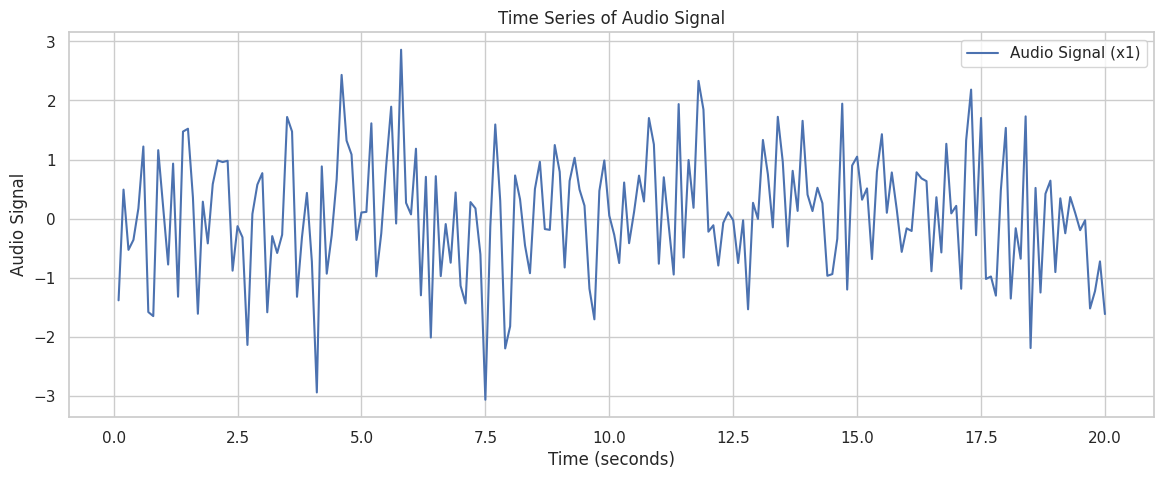

In [39]:
# Time Series Plots
plt.figure(figsize=(14, 5))
plt.plot(df['time'], df['x1'], label='Audio Signal (x1)')
plt.xlabel('Time (seconds)')
plt.ylabel('Audio Signal')
plt.title('Time Series of Audio Signal')
plt.legend()
plt.grid(True)
plt.show()

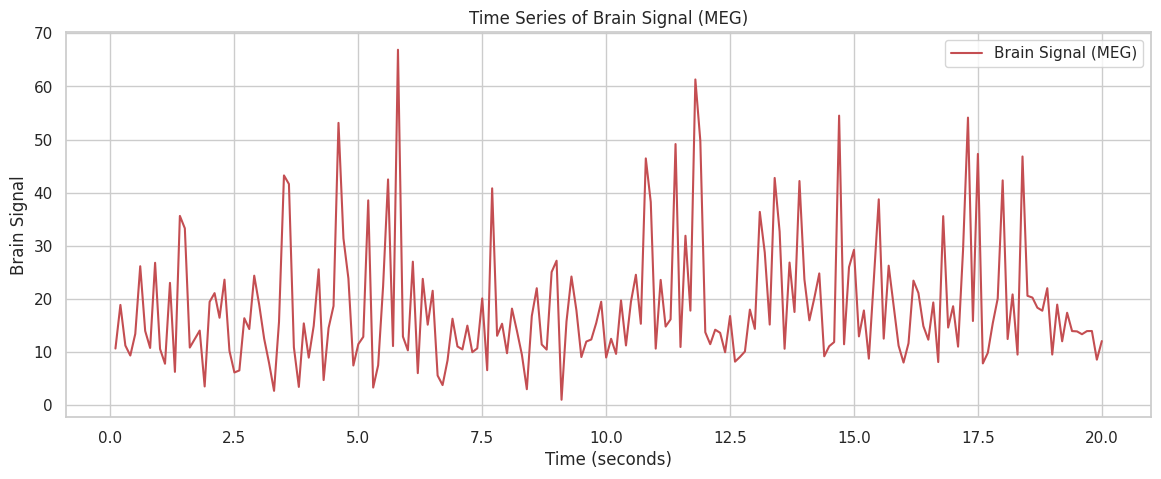

In [40]:
plt.figure(figsize=(14, 5))
plt.plot(df['time'], df['y'], color='r', label='Brain Signal (MEG)')
plt.xlabel('Time (seconds)')
plt.ylabel('Brain Signal')
plt.title('Time Series of Brain Signal (MEG)')
plt.legend()
plt.grid(True)
plt.show()

Task 1.2 Distribution plot for each input/output signal

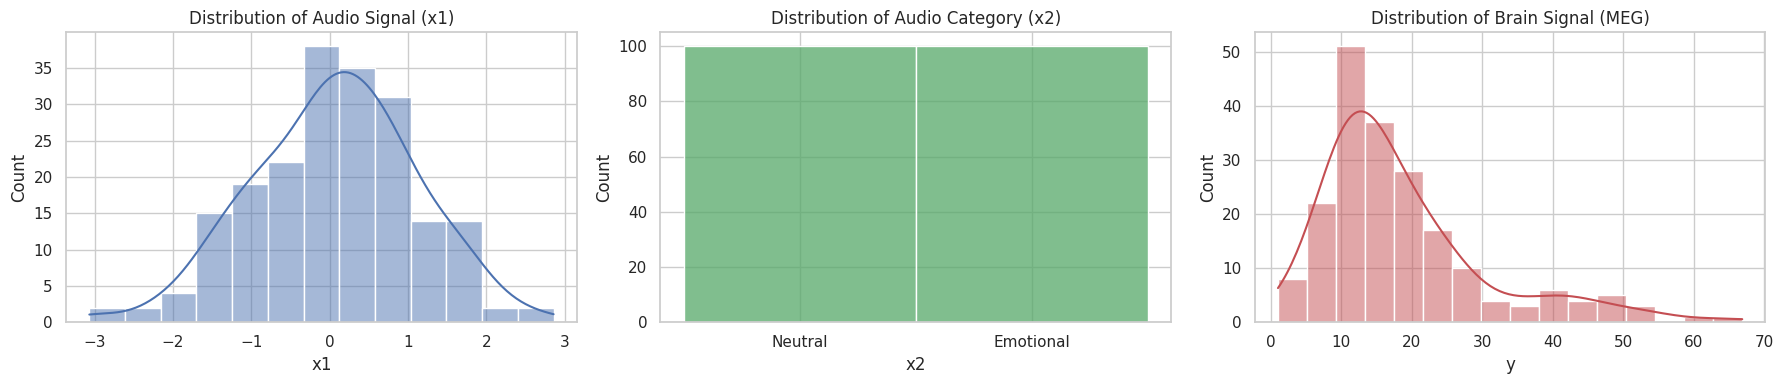

In [41]:
# Distribution Plots (Histograms)
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
sns.histplot(df['x1'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Audio Signal (x1)')

sns.histplot(df['x2'], discrete=True, ax=axes[1], color='g')
axes[1].set_title('Distribution of Audio Category (x2)')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Neutral", "Emotional"])

sns.histplot(df['y'], kde=True, ax=axes[2], color='r')
axes[2].set_title('Distribution of Brain Signal (MEG)')
plt.tight_layout()
plt.show()


Task 1.3 Correlation and Scatter plots (between the audio input and output brain signal)

Correlation between Audio and Brain Signals:
           x1         y
x1  1.000000  0.765365
y   0.765365  1.000000


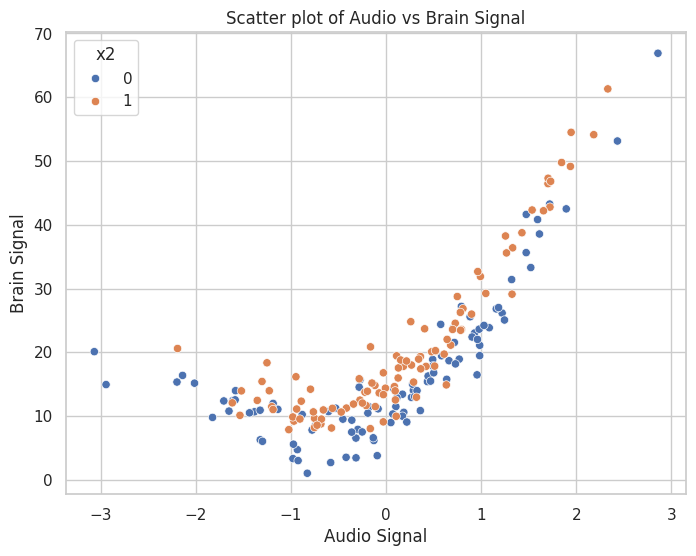

In [42]:
# Correlation and Scatter Plots
correlation = df[['x1', 'y']].corr()
print("Correlation between Audio and Brain Signals:\n", correlation)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='x1', y='y', hue='x2', data=df)
plt.xlabel('Audio Signal')
plt.ylabel('Brain Signal')
plt.title('Scatter plot of Audio vs Brain Signal')
plt.grid(True)
plt.show()

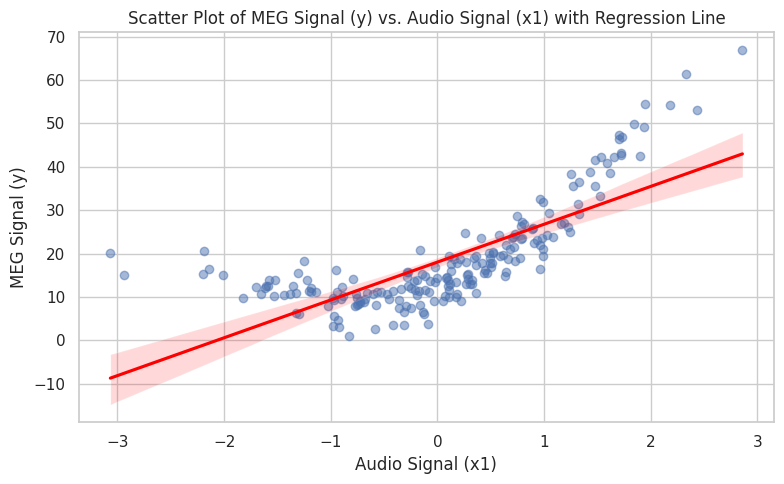

In [43]:
# Create scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x="x1", y="y", data=df, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title("Scatter Plot of MEG Signal (y) vs. Audio Signal (x1) with Regression Line")
plt.xlabel("Audio Signal (x1)")
plt.ylabel("MEG Signal (y)")
plt.grid(True)
plt.tight_layout()
plt.show()

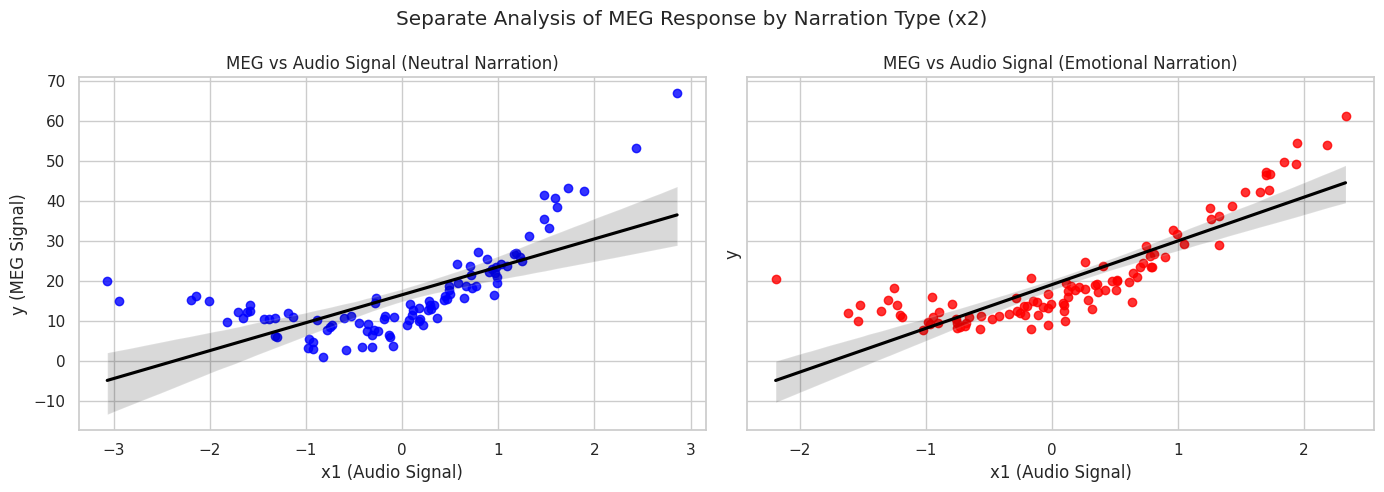

In [44]:
# Create separate subsets for x2 = 0 (neutral) and x2 = 1 (emotional)
data_neutral = df[df["x2"] == 0]
data_emotional = df[df["x2"] == 1]

# Scatter plots for each group
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.regplot(x="x1", y="y", data=data_neutral, ax=axes[0], color="blue", line_kws={"color": "black"})
axes[0].set_title("MEG vs Audio Signal (Neutral Narration)")
axes[0].set_xlabel("x1 (Audio Signal)")
axes[0].set_ylabel("y (MEG Signal)")

sns.regplot(x="x1", y="y", data=data_emotional, ax=axes[1], color="red", line_kws={"color": "black"})
axes[1].set_title("MEG vs Audio Signal (Emotional Narration)")
axes[1].set_xlabel("x1 (Audio Signal)")

plt.suptitle("Separate Analysis of MEG Response by Narration Type (x2)")
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

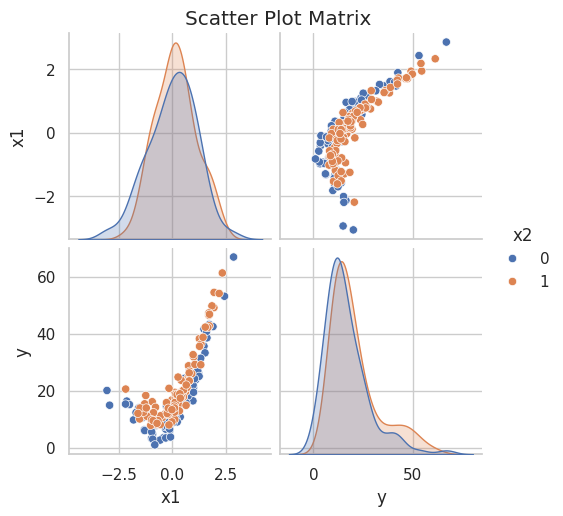

In [45]:
# Scatter plots and correlation matrix
plt.figure(figsize=(8, 6))
sns.pairplot(df[["x1", "x2", "y"]], kind="scatter", hue="x2", diag_kind="kde")
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()

Task 1.4 Boxplots of the output brain signals

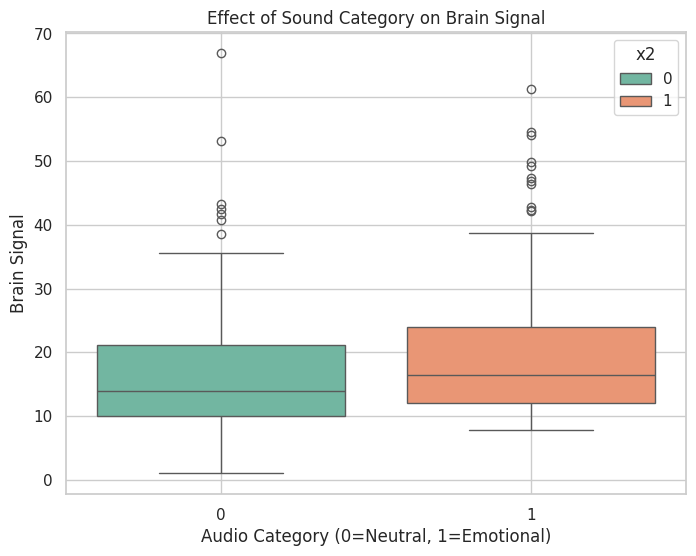

In [46]:
# Boxplots to examine effects of sound categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='x2', palette="Set2", y='y', hue='x2', data=df)
plt.xlabel('Audio Category (0=Neutral, 1=Emotional)')
plt.ylabel('Brain Signal')
plt.title('Effect of Sound Category on Brain Signal')
plt.grid(True)
plt.show()

Data Analysis for each type of input

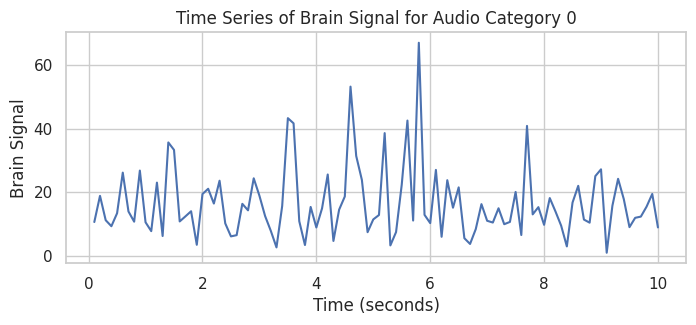

<ipython-input-47-91438e5cd5fc>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(subset['y'], kde=True, palette="Set2")


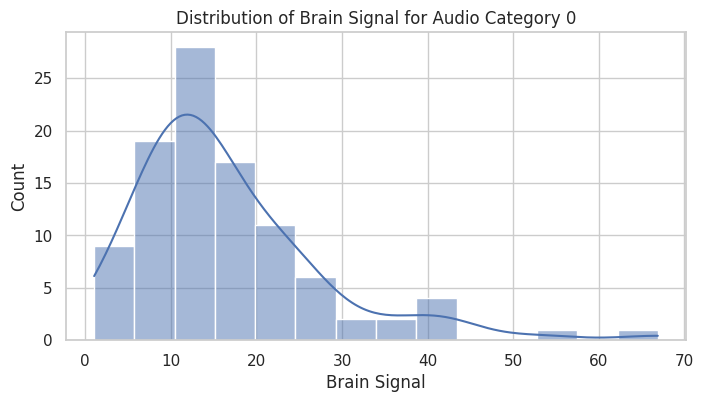

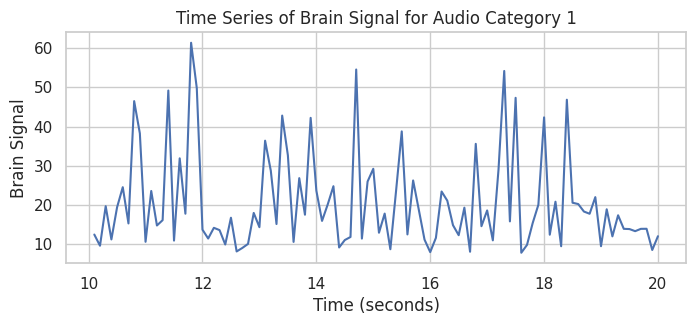

<ipython-input-47-91438e5cd5fc>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(subset['y'], kde=True, palette="Set2")


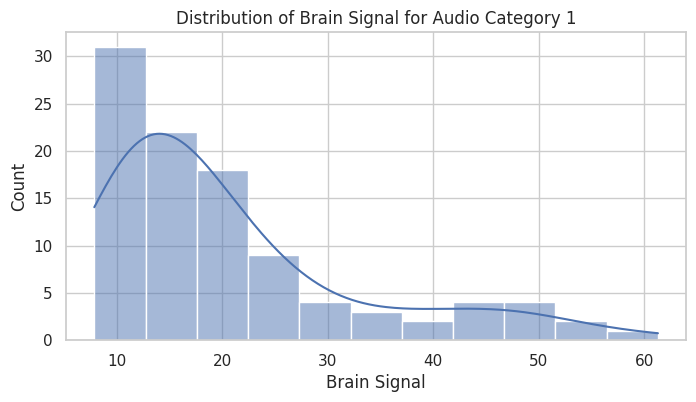

Preliminary data analysis completed successfully.


In [47]:
# Separate analysis by sound categories
for category in df['x2'].unique():
    subset = df[df['x2'] == category]

    plt.figure(figsize=(8, 3))
    plt.plot(subset['time'], subset['y'])
    plt.title(f'Time Series of Brain Signal for Audio Category {category}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Brain Signal')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.histplot(subset['y'], kde=True, palette="Set2")
    plt.title(f'Distribution of Brain Signal for Audio Category {category}')
    plt.xlabel('Brain Signal')
    plt.show()

print("Preliminary data analysis completed successfully.")

In [48]:
df.columns

Index(['time', 'x1', 'x2', 'y'], dtype='object')

# Task 2.1 Estimate Parameters (Least Squares)

Defining models so it would be easier to call

In [49]:
# Candidate regression models definitions
df['x1_sq'] = df['x1']**2
df['x1_cube'] = df['x1']**3
df['x1_4'] = df['x1']**4
df['x1_5'] = df['x1']**5

In [50]:
# Define model structures
model_features = {
    'Model 1': ['x1_cube', 'x1_5', 'x2'],
    'Model 2': ['x1', 'x2'],
    'Model 3': ['x1', 'x1_sq', 'x1_4', 'x2'],
    'Model 4': ['x1', 'x1_sq', 'x1_cube', 'x1_5', 'x2'],
    'Model 5': ['x1', 'x1_cube', 'x1_4', 'x2']
}


In [51]:
# Dictionary to store estimated theta values
theta_dict = {}


In [52]:
# Estimate parameters manually using normal equation
for model_name, features in model_features.items():
    X_model = df[features]
    X_model = sm.add_constant(X_model)  # add intercept
    y_vector = df['y']

    # Manual least squares estimation
    X_np = X_model.values
    y_np = y_vector.values
    theta_hat = np.linalg.inv(X_np.T @ X_np) @ X_np.T @ y_np

    # Store and print
    theta_dict[model_name] = theta_hat
    print(f"{model_name} - Estimated Parameters (θ̂):\n{theta_hat}\n{'-'*50}")

Model 1 - Estimated Parameters (θ̂):
[16.93575071  5.17127282 -0.53732529  2.20201791]
--------------------------------------------------
Model 2 - Estimated Parameters (θ̂):
[16.63559026  8.62910686  2.81398685]
--------------------------------------------------
Model 3 - Estimated Parameters (θ̂):
[10.17369609  8.55216135  6.24691708 -0.28296309  4.15988326]
--------------------------------------------------
Model 4 - Estimated Parameters (θ̂):
[10.85328261  9.35397322  4.64696205 -0.57792162  0.07479626  4.34321644]
--------------------------------------------------
Model 5 - Estimated Parameters (θ̂):
[14.13172537  8.07945806  0.31445012  0.55920502  3.96814553]
--------------------------------------------------


# Setting up the Models

 Create a variable to store the models

In [53]:
# Prepare dictionary to store model results
model_results = {}

Setting up Model 1

In [54]:
# Model 1: y = θ1*x1³ + θ2*x1⁵ + θ3*x2 + θbias + ε
X_model1 = df[['x1_cube', 'x1_5', 'x2']]
X_model1 = sm.add_constant(X_model1)
model1 = sm.OLS(df['y'], X_model1).fit()
model_results['Model 1'] = model1

Setting up Model 2

In [55]:
# Model 2: y = θ1*x1 + θ2*x2 + θbias + ε
X_model2 = df[['x1', 'x2']]
X_model2 = sm.add_constant(X_model2)
model2 = sm.OLS(df['y'], X_model2).fit()
model_results['Model 2'] = model2

Setting up Model 3

In [56]:
# Model 3: y = θ1*x1 + θ2*x1² + θ3*x1⁴ + θ4*x2 + θbias + ε
X_model3 = df[['x1', 'x1_sq', 'x1_4', 'x2']]
X_model3 = sm.add_constant(X_model3)
model3 = sm.OLS(df['y'], X_model3).fit()
model_results['Model 3'] = model3

Setting up Model 4

In [57]:
# Model 4: y = θ1*x1 + θ2*x1² + θ3*x1³ + θ4*x1⁵ + θ5*x2 + θbias + ε
X_model4 = df[['x1', 'x1_sq', 'x1_cube', 'x1_5', 'x2']]
X_model4 = sm.add_constant(X_model4)
model4 = sm.OLS(df['y'], X_model4).fit()
model_results['Model 4'] = model4

Setting up Model 5

In [58]:
# Model 5: y = θ1*x1 + θ2*x1³ + θ3*x1⁴ + θ4*x2 + θbias + ε
X_model5 = df[['x1', 'x1_cube', 'x1_4', 'x2']]
X_model5 = sm.add_constant(X_model5)
model5 = sm.OLS(df['y'], X_model5).fit()
model_results['Model 5'] = model5

# Printing out Thetha Estimates for every candidate model

In [59]:
# Show Thetha Parameters
for name, model in model_results.items():
    print(f"{name}:")
    print(f"Theta Parameters:\n{model.params}\n")
    print(f"R-squared: {model.rsquared:.4f}\n")
    print("\n")

Model 1:
Theta Parameters:
const      16.935751
x1_cube     5.171273
x1_5       -0.537325
x2          2.202018
dtype: float64

R-squared: 0.5789



Model 2:
Theta Parameters:
const    16.635590
x1        8.629107
x2        2.813987
dtype: float64

R-squared: 0.5998



Model 3:
Theta Parameters:
const    10.173696
x1        8.552161
x1_sq     6.246917
x1_4     -0.282963
x2        4.159883
dtype: float64

R-squared: 0.9417



Model 4:
Theta Parameters:
const      10.853283
x1          9.353973
x1_sq       4.646962
x1_cube    -0.577922
x1_5        0.074796
x2          4.343216
dtype: float64

R-squared: 0.9323



Model 5:
Theta Parameters:
const      14.131725
x1          8.079458
x1_cube     0.314450
x1_4        0.559205
x2          3.968146
dtype: float64

R-squared: 0.8245





# Printing RSS for the Models

Task 2.2 Compute RSS (Residual Sum of Squares)

In [60]:
# Calculate and print RSS for each model
rss_values = {}

for name, model in model_results.items():
    rss = np.sum(model.resid ** 2)
    rss_values[name] = rss
    print(f"{name} RSS: {rss:.4f}")
    print("\n")

Model 1 RSS: 11825.4214


Model 2 RSS: 11238.9496


Model 3 RSS: 1636.1676


Model 4 RSS: 1902.0629


Model 5 RSS: 4928.3121




# Compute Log-Likelihood

Task 2.3 Compute log-likelihood for each candidate model

In [61]:
# Calculate log-likelihood
log_likelihood_values = {}

for name, model in model_results.items():
    n = len(df)
    rss = rss_values[name]
    sigma_squared = rss / (n - 1)

    log_likelihood = -(n/2)*np.log(2*np.pi) - (n/2)*np.log(sigma_squared) - (1/(2*sigma_squared))*rss
    log_likelihood_values[name] = log_likelihood

    print(f"{name} Log-Likelihood: {log_likelihood:.4f}")
    print("\n")

Model 1 Log-Likelihood: -691.7579


Model 2 Log-Likelihood: -686.6713


Model 3 Log-Likelihood: -493.9684


Model 4 Log-Likelihood: -509.0267


Model 5 Log-Likelihood: -604.2324




# Compute AIC and BIC (explicitly)

Task 2.4 Compute AIC and BIC explicitly

In [62]:
aic_bic_values = {}

for name, model in model_results.items():
    k = len(model.params)
    llf = log_likelihood_values[name]

    # AIC and BIC calculation
    aic = 2*k - 2*llf
    bic = k*np.log(n) - 2*llf
    aic_bic_values[name] = {'AIC': aic, 'BIC': bic}

    print(f"{name} - AIC: {aic:.4f}, BIC: {bic:.4f}")
    print("\n")

Model 1 - AIC: 1391.5158, BIC: 1404.7091


Model 2 - AIC: 1379.3426, BIC: 1389.2375


Model 3 - AIC: 997.9368, BIC: 1014.4284


Model 4 - AIC: 1030.0533, BIC: 1049.8432


Model 5 - AIC: 1218.4648, BIC: 1234.9564




# View the Residual Distribution

Task 2.5 Check Residual Distribution (Normality)

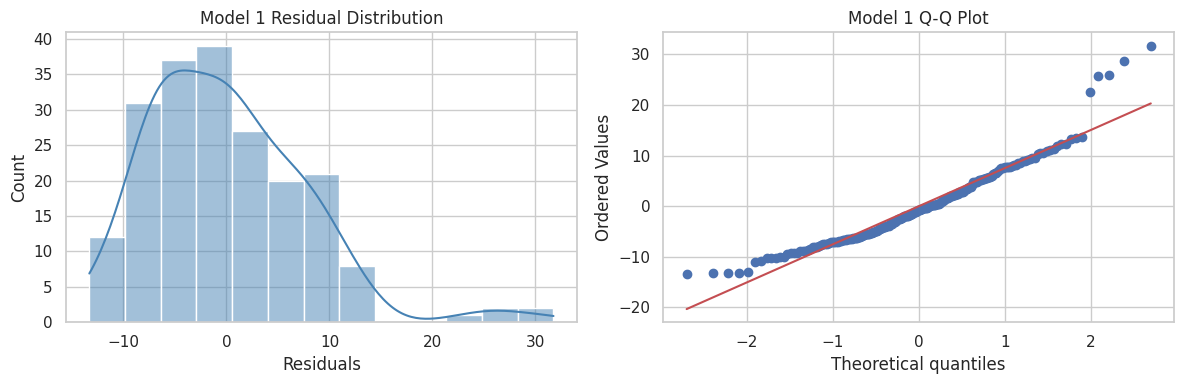

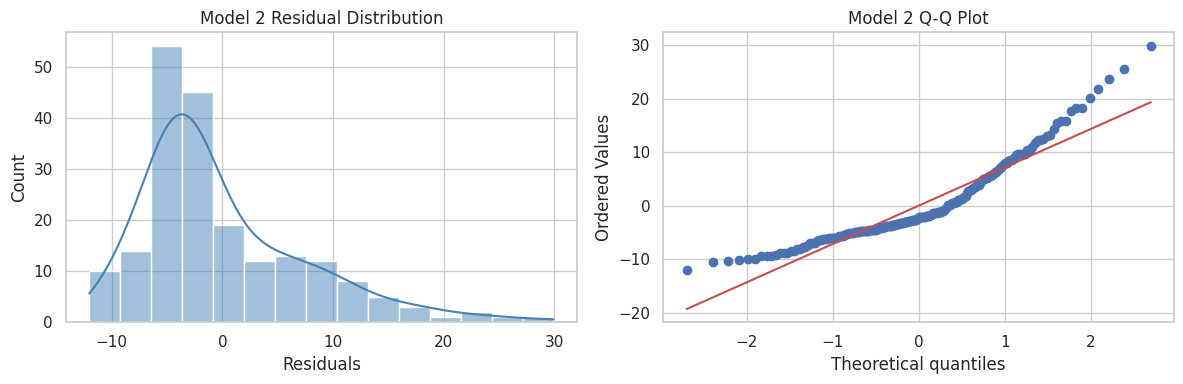

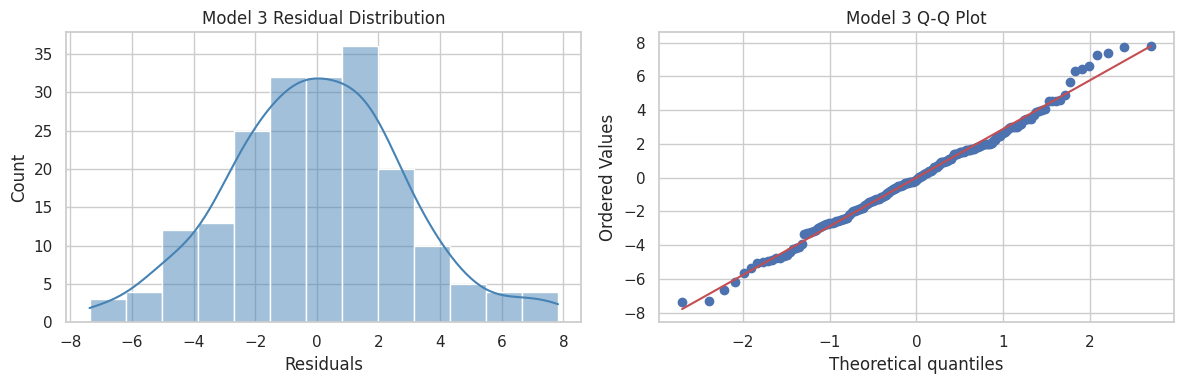

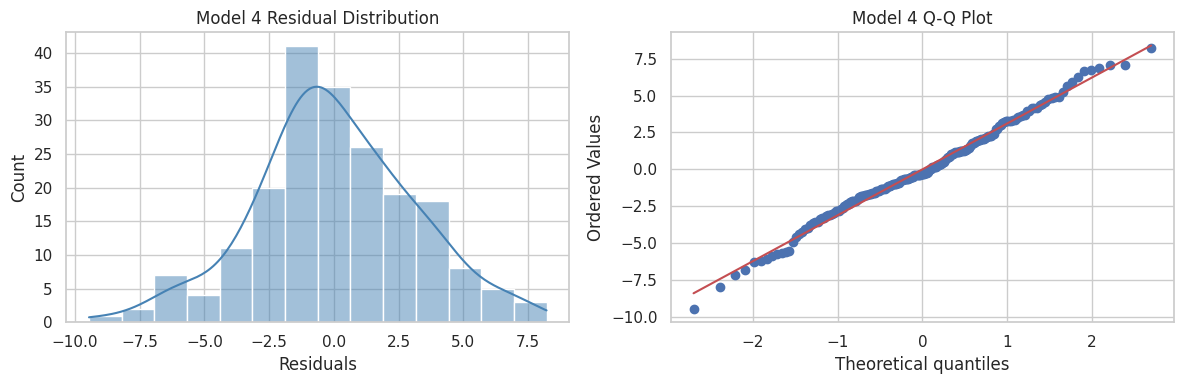

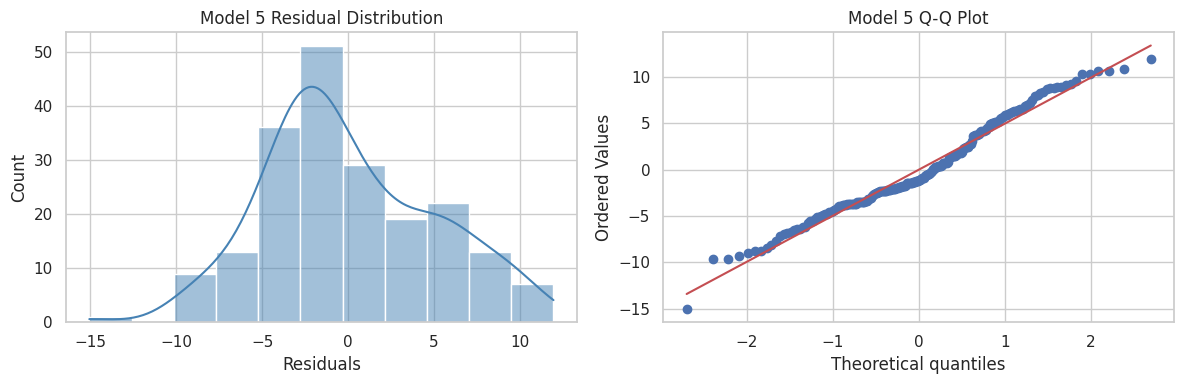

In [63]:
# Loop over all candidate models
for model_name, model in model_results.items():
    residuals = model.resid

    # Set up side-by-side plots clearly
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Residual Histogram with grid
    sns.histplot(residuals, kde=True, ax=axes[0], color='steelblue')
    axes[0].set_title(f'{model_name} Residual Distribution')
    axes[0].set_xlabel('Residuals')
    axes[0].set_ylabel('Count')
    axes[0].grid(True)

    # Q-Q Plot with grid
    stats.probplot(residuals, dist="norm", plot=axes[1])
    axes[1].set_title(f'{model_name} Q-Q Plot')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Selecting the best Model

Task 2.6 Selecting Best Regression Model based on AIC, BIC

In [64]:
# First evaluate models based on AIC, BIC, and residual normality
print("Summary of AIC and BIC for candidate models:")
for model_name, criteria in aic_bic_values.items():
    print(f"{model_name}: AIC={criteria['AIC']:.4f}, BIC={criteria['BIC']:.4f}")
    print("\n")

Summary of AIC and BIC for candidate models:
Model 1: AIC=1391.5158, BIC=1404.7091


Model 2: AIC=1379.3426, BIC=1389.2375


Model 3: AIC=997.9368, BIC=1014.4284


Model 4: AIC=1030.0533, BIC=1049.8432


Model 5: AIC=1218.4648, BIC=1234.9564




In [75]:
# Selecting best models explicitly
best_aic_model = min(aic_bic_values, key=lambda x: aic_bic_values[x]['AIC'])
best_bic_model = min(aic_bic_values, key=lambda x: aic_bic_values[x]['BIC'])

print(f"\nBest model based on AIC: {best_aic_model}")
print(f"Best model based on BIC: {best_bic_model}\n")


Best model based on AIC: Model 3
Best model based on BIC: Model 3



Use overall best model

In [76]:
# Selecting best models automatically
aic_bic = {
    name: {'AIC': model.aic, 'BIC': model.bic}
    for name, model in model_results.items()
}

# Select model with lowest AIC
best_model_name = min(aic_bic, key=lambda m: aic_bic[m]['AIC'])
print(f"Selected Best Model: {best_model_name}")

Selected Best Model: Model 3


In [77]:
# Use the best model already identified
model = model_results[best_model_name]
theta_hat = model.params

Top 2 Influential Params

In [78]:
# Get top 2 influential parameters
top2 = theta_hat.drop('const').abs().nlargest(2).index.tolist()
print(f"Top 2 influential parameters: {top2}")

Top 2 influential parameters: ['x1', 'x1_sq']


Run AIC / BIC

In [80]:
# Prepare data for ABC
X_full = sm.add_constant(df[model_features[best_model_name]])
y_full = df['y']

In [81]:
# ABC function
def run_abc(theta_hat, top2, prior_pct=0.30, n_samples=5000, tolerance=0.05):
    prior_ranges = {
        param: (theta_hat[param] * (1 - prior_pct), theta_hat[param] * (1 + prior_pct))
        for param in top2
    }
    samples = []
    for _ in range(n_samples):
        sampled = {p: uniform.rvs(*prior_ranges[p]) for p in top2}
        theta = theta_hat.copy()
        theta.update(sampled)
        y_pred = np.dot(X_full, theta)
        mse = np.mean((y_full - y_pred)**2)
        samples.append([sampled[top2[0]], sampled[top2[1]], mse])
    df_abc = pd.DataFrame(samples, columns=[top2[0], top2[1], 'mse'])
    accepted = df_abc.nsmallest(int(n_samples * tolerance), 'mse')
    return accepted[[top2[0], top2[1]]]

In [82]:
# Run ABC
posterior_samples = run_abc(theta_hat, top2)

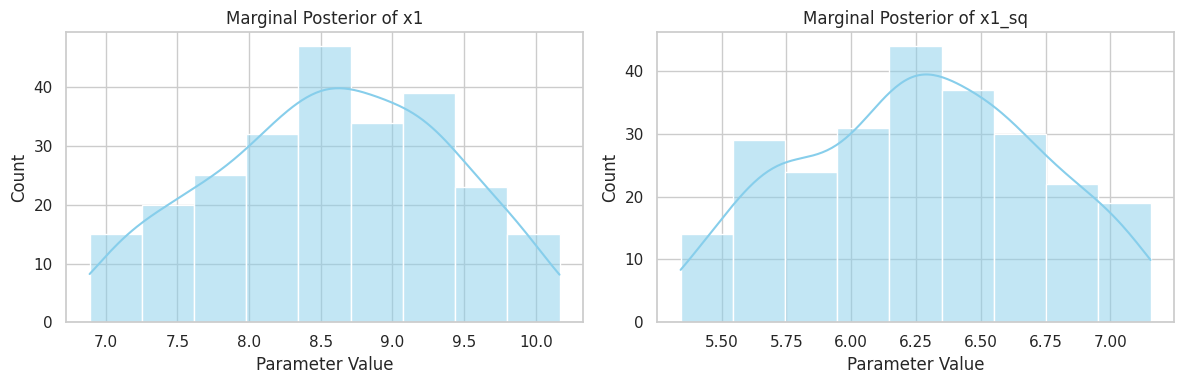

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for i, param in enumerate(top2):
    sns.histplot(posterior_samples[param], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Marginal Posterior of {param}')
    axes[i].set_xlabel('Parameter Value')
    axes[i].grid(True)
plt.tight_layout()
plt.show()

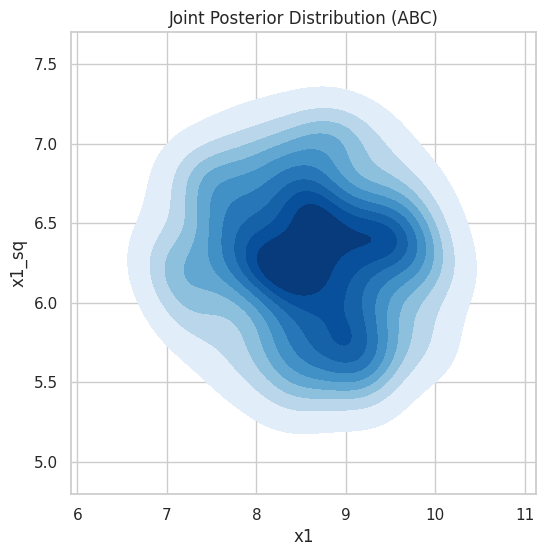

In [84]:
# Plot joint posterior
plt.figure(figsize=(6, 6))
sns.kdeplot(
    x=posterior_samples[top2[0]],
    y=posterior_samples[top2[1]],
    cmap="Blues", fill=True
)
plt.title("Joint Posterior Distribution (ABC)")
plt.xlabel(top2[0])
plt.ylabel(top2[1])
plt.grid(True)
plt.show()

In [68]:
# Split data explicitly (70% train, 30% test)
train, test = train_test_split(df, test_size=0.3, random_state=42)

Train and Test operations

In [69]:
# Training set preparation
X_train = sm.add_constant(train[selected_features])
y_train = train['y']

# Testing set preparation
X_test = sm.add_constant(test[selected_features])
y_test = test['y']

Fitting the model

In [70]:
# Fit the selected model explicitly on training data
final_model = sm.OLS(y_train, X_train).fit()

# Making Predictions with 95% confidence intervals

In [71]:
# Prediction with 95% confidence intervals explicitly on test set
predictions = final_model.get_prediction(X_test)
pred_summary = predictions.summary_frame(alpha=0.05)  # 95% confidence intervals

# Print explicit prediction summary
pred_summary.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
95,7.978351,0.545448,6.899623,9.057079,1.981107,13.975594
15,14.341013,0.430475,13.489666,15.192360,8.380471,20.301556
30,10.094724,0.724614,8.661661,11.527788,4.023732,16.165717
158,11.199781,0.425426,10.358419,12.041143,5.240657,17.158906
128,17.052750,0.426011,16.210230,17.895269,11.093462,23.012038


# Prediction Plot

Task 2.7 Prediction Plot

In [29]:
# Explicit values for plotting
y_pred = pred_summary['mean']
y_lower = pred_summary['obs_ci_lower']  # Prediction interval lower bound
y_upper = pred_summary['obs_ci_upper']  # Prediction interval upper bound
y_err_lower = y_pred - y_lower
y_err_upper = y_upper - y_pred

# Error bars explicitly calculated for confidence interval
plt.figure(figsize=(12, 6))
plt.errorbar(range(len(y_test)), y_pred, yerr=[y_err_lower, y_err_upper],
             fmt='o', color='blue', ecolor='gray', capsize=4, label='Predictions with 95% CI')
plt.scatter(range(len(y_test)), y_test, alpha=0.6,  color='red', label='Actual Testing Data')

plt.xlabel('Test Sample Index')
plt.ylabel('Brain Signal (y)')
plt.title('Model Predictions on Test Data with 95% Confidence Intervals (Error Bars)')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'pred_summary' is not defined

Selecting the top 2 Parameters for ABC

In [28]:
# Assign model.params to a variable
theta_hat = model.params

# Get top 2 largest absolute coefficients (excluding const)
top2 = theta_hat.drop('const').abs().nlargest(2).index.tolist()
print(f"Top 2 influential parameters: {top2}")

NameError: name 'model' is not defined

Define ABC runner for 30% and 50% prior ranges

In [ ]:
# Use Model 4 features for ABC (or update to your selected model)
# since it is model 4 that captures all the
model_features_list = ['x1', 'x1_sq', 'x1_cube', 'x1_5', 'x2']
X_full = sm.add_constant(df[model_features_list])
y_full = df['y']

In [ ]:
# Define uniform prior ranges (±50% of estimate)
prior_ranges = {
    param: (theta_hat[param] * 0.5, theta_hat[param] * 1.5)
    for param in top2
}

# Fix all other parameters
fixed_theta = theta_hat.drop(top2)

In [ ]:
n_samples = 1000
tolerance = 0.03  # accept top 5%

samples = []
errors = []

for _ in range(n_samples):
    # Sample θ1 and θ2 from uniform priors
    sampled = {
        param: uniform.rvs(*prior_ranges[param])
        for param in top2
    }

      # Reconstruct full θ vector
    theta_sample = fixed_theta.copy() # Start with fixed parameters
    theta_sample.update(sampled) # Update with sampled values
    theta_sample = theta_sample.reindex(X_full.columns, fill_value=0) # Reindex to match X_full columns


    # Predict y using sampled θ
    y_pred = np.dot(X_full, theta_sample)
    mse = np.mean((y_full - y_pred) ** 2)

    samples.append([sampled[top2[0]], sampled[top2[1]], mse])

# Create DataFrame
abc_df = pd.DataFrame(samples, columns=[top2[0], top2[1], 'mse'])

# Keep top 5% with lowest error
abc_df_sorted = abc_df.sort_values(by='mse')
n_accept = int(n_samples * tolerance)
posterior_samples = abc_df_sorted.iloc[:n_accept][[top2[0], top2[1]]]

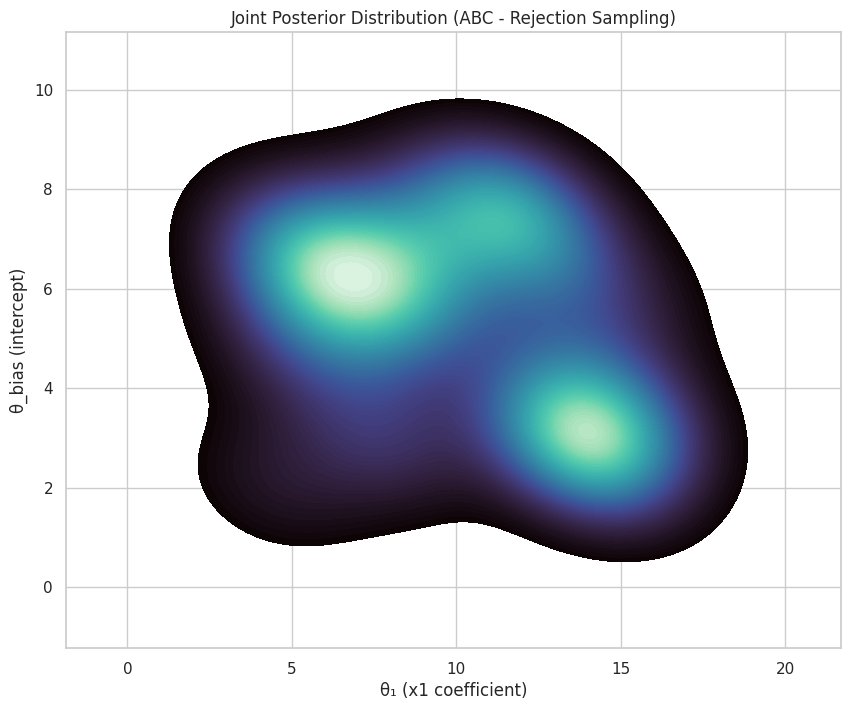

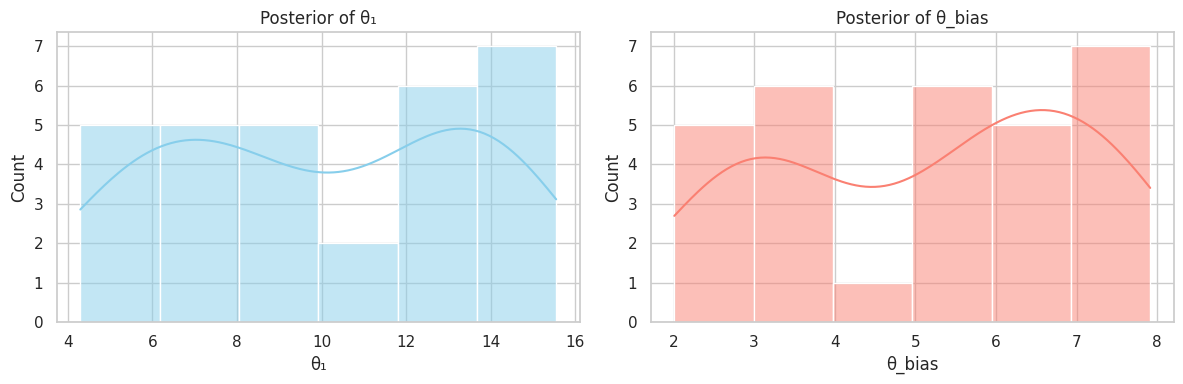

In [ ]:
# Plot posteriors if any samples accepted
if len(posterior_samples) == 0:  # Check if any samples were accepted
    print("No samples accepted — try increasing ε further.")
else:
    # Joint posterior
    plt.figure(figsize=(10, 8))
    sns.kdeplot(x=posterior_samples[top2[0]], y=posterior_samples[top2[1]], fill=True, cmap="mako", levels=100, thresh=0.05)
    plt.xlabel("θ₁ (x1 coefficient)")
    plt.ylabel("θ_bias (intercept)")
    plt.title("Joint Posterior Distribution (ABC - Rejection Sampling)")
    plt.grid(True)
    plt.show()

    # Marginal posteriors
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(posterior_samples[top2[0]], kde=True, ax=axs[0], color="skyblue")
    axs[0].set_title("Posterior of θ₁")
    axs[0].set_xlabel("θ₁")

    sns.histplot(posterior_samples[top2[1]], kde=True, ax=axs[1], color="salmon")
    axs[1].set_title("Posterior of θ_bias")
    axs[1].set_xlabel("θ_bias")

    plt.tight_layout()
    plt.show()